In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Your gas usage data
data = pd.Series([247, 225, 149, 143, 59, 36, 32, 31, 27, 39, 85, 201, 233, 242, 247, 138, 34, 30, 28, 27, 26, 37, 85, 187])

# Define the range of alpha and gamma values
alpha_values = np.arange(0.1, 1.1, 0.1)
gamma_values = np.arange(0.1, 1.1, 0.1)

best_alpha = None
best_gamma = None
best_mad = float('inf')

# Loop through alpha and gamma combinations
for alpha in alpha_values:
    for gamma in gamma_values:
        try:
            # Apply Holt-Winters model (additive seasonality, no trend)
            model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=12)
            fit_model = model.fit(smoothing_level=alpha, smoothing_seasonal=gamma)

            # Forecast for the next 12 periods
            forecast = fit_model.forecast(12)

            # Calculate MAD for the forecasted periods (against actual values)
            actual_values = data[-12:]  # Last 12 actual values
            mad = np.mean(np.abs(actual_values - forecast[:12]))

            # Check if this combination gives a lower MAD
            if mad < best_mad:
                best_mad = mad
                best_alpha = alpha
                best_gamma = gamma

        except Exception as e:
            print(f"Failed for alpha: {alpha}, gamma: {gamma}, error: {e}")

# Output the best alpha, gamma, and MAD
if best_alpha and best_gamma:
    print(f'Best alpha: {best_alpha}, Best gamma: {best_gamma}, MAD: {best_mad}')
else:
    print('No suitable alpha and gamma values found.')


No suitable alpha and gamma values found.


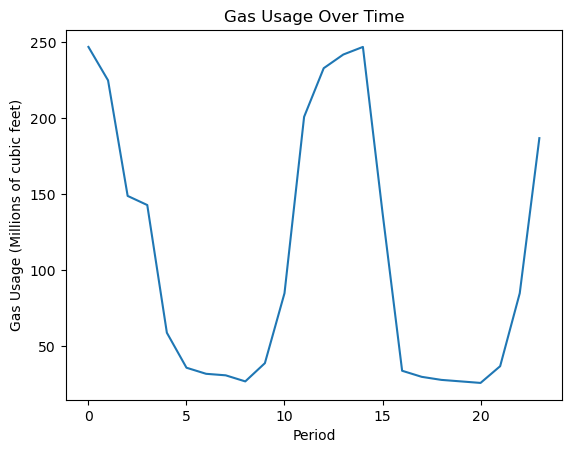

In [3]:
import matplotlib.pyplot as plt

# Plot the data to visually inspect for seasonality
data.plot(title="Gas Usage Over Time")
plt.xlabel("Period")
plt.ylabel("Gas Usage (Millions of cubic feet)")
plt.show()


/Users/likhithareddykesara/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


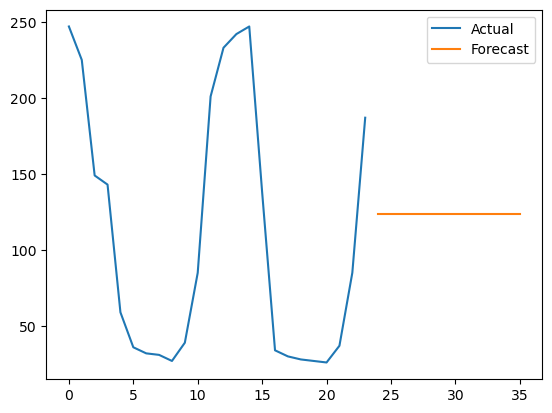

24    123.366198
25    123.366198
26    123.366198
27    123.366198
28    123.366198
29    123.366198
30    123.366198
31    123.366198
32    123.366198
33    123.366198
34    123.366198
35    123.366198
dtype: float64


In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Try simple exponential smoothing without seasonality
model = SimpleExpSmoothing(data)
fit_model = model.fit(smoothing_level=0.5)  # Adjust smoothing level as needed
forecast = fit_model.forecast(12)

# Plot the original data and forecast
data.plot(label='Actual', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.show()

# Print forecasted values
print(forecast)


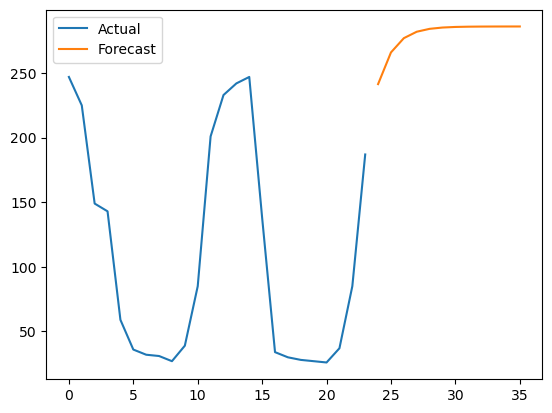

24    241.463220
25    265.986059
26    277.027815
27    281.999523
28    284.238105
29    285.246059
30    285.699904
31    285.904254
32    285.996266
33    286.037695
34    286.056350
35    286.064749
Name: predicted_mean, dtype: float64


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p,d,q) values may need to be adjusted based on the data
model = ARIMA(data, order=(1,1,1))  # (p, d, q) represent autoregressive, difference, and moving average terms
fit_model = model.fit()

# Forecast the next 12 periods
forecast = fit_model.forecast(12)

# Plot the forecast
data.plot(label='Actual', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.show()

# Print forecasted values
print(forecast)


In [6]:
print(data.isnull().sum())


0


In [8]:
df=pd.read_excel('/Users/likhithareddykesara/Downloads/data-10_6_2024-6_21 PM.xlsx')

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assume data is loaded into a DataFrame df with 'Gas Usage' column
model = ExponentialSmoothing(df['Gas Usage'], seasonal='add', seasonal_periods=12).fit(smoothing_level=0.4, smoothing_seasonal=0.6)
forecast = model.forecast(steps=12)

# MAD calculation
mad = np.mean(np.abs(df['Gas Usage'] - forecast))

In [10]:
mad

nan

Forecast for October 2010: 3.46


/Users/likhithareddykesara/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/1270201560.py:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ).fit(smoothing_level=0.15, smoothing_slope=0.25, smoothing_seasonal=0.8)


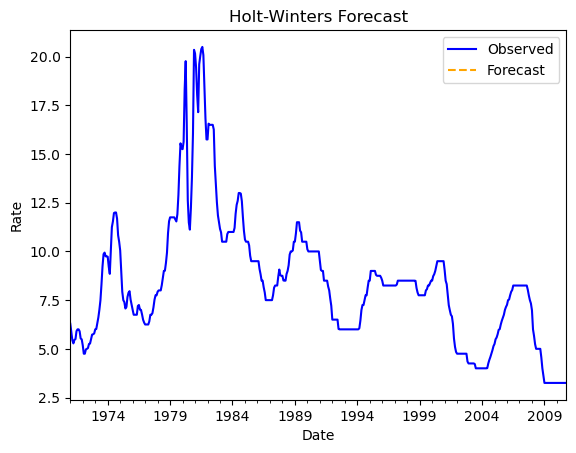

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data here
# Replace 'your_data.csv' with the actual filename
data = pd.read_excel('/Users/likhithareddykesara/Downloads/data-10_6_2024-6_27 PM.xlsx')

# Assuming your data has two columns: 'Date' and 'Rate'
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Fit the Holt-Winters model
model = ExponentialSmoothing(
    data['Rate'], 
    seasonal='add', 
    seasonal_periods=12,  # Assuming 12 months per cycle
    trend=None
).fit(smoothing_level=0.15, smoothing_slope=0.25, smoothing_seasonal=0.8)

# Forecasting for October 2010 (out-of-sample forecast)
forecast_horizon = 1  # Specify the number of months to forecast
forecast = model.forecast(steps=forecast_horizon)

# Print the forecast
print(f"Forecast for October 2010: {forecast.values[0]:.2f}")

# Plot the data and the forecast
data['Rate'].plot(label='Observed', color='blue')
forecast.plot(label='Forecast', color='orange', linestyle='--')
plt.title("Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.show()

In [13]:
data.head()

,Month,Period,Gas Usage
0,Jan,1,247
1,Feb,2,225
2,Mar,3,149
3,Apr,4,143
4,May,5,59


In [16]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Additive Holt-Winters Forecast for the next event: 92.607 in.
Multiplicative Holt-Winters Forecast for the next event: 92.604 in.


/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/3113361950.py:21: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_additive = model_additive.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/3113361950.py:26: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_multiplicative = model_multiplicative.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/3113361950.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plt.plot(df['Year'].append(pd.Series([2020])), np.append(df['Event_A'], forecast_additive), label='Additive Forecast')
/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/3113361950.py:36: FutureWarning

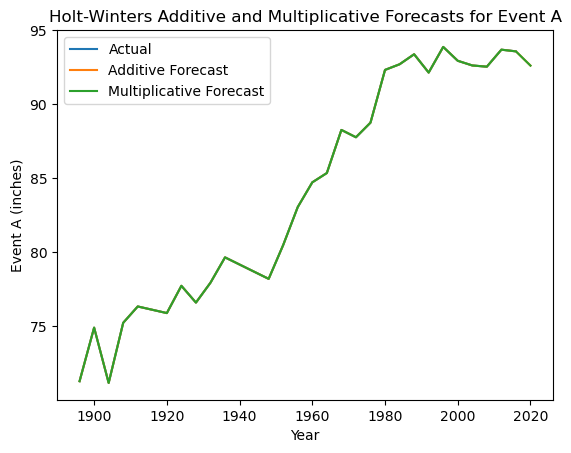

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data for Event A
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 
             1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
             2004, 2008, 2012, 2016],
    'Event_A': [71.294, 74.911, 71.178, 75.238, 76.341, 75.894, 77.735, 76.602, 77.946, 79.656, 
                78.205, 80.492, 83.054, 84.722, 85.351, 88.262, 87.767, 88.753, 92.315, 92.695, 
                93.372, 92.135, 93.867, 92.931, 92.615, 92.532, 93.681, 93.567]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Additive Holt-Winters
model_additive = ExponentialSmoothing(df['Event_A'], trend='add', seasonal='add', seasonal_periods=4)
fit_additive = model_additive.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
forecast_additive = fit_additive.forecast(1)

# Multiplicative Holt-Winters
model_multiplicative = ExponentialSmoothing(df['Event_A'], trend='add', seasonal='mul', seasonal_periods=4)
fit_multiplicative = model_multiplicative.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
forecast_multiplicative = fit_multiplicative.forecast(1)

# Display the forecasts
print(f"Additive Holt-Winters Forecast for the next event: {forecast_additive.iloc[0]:.3f} in.")
print(f"Multiplicative Holt-Winters Forecast for the next event: {forecast_multiplicative.iloc[0]:.3f} in.")

# Plot the actual vs forecasted values
plt.plot(df['Year'], df['Event_A'], label='Actual')
plt.plot(df['Year'].append(pd.Series([2020])), np.append(df['Event_A'], forecast_additive), label='Additive Forecast')
plt.plot(df['Year'].append(pd.Series([2020])), np.append(df['Event_A'], forecast_multiplicative), label='Multiplicative Forecast')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Event A (inches)')
plt.title('Holt-Winters Additive and Multiplicative Forecasts for Event A')
plt.show()


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data for Event B
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 
             1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000,
             2004, 2008, 2012, 2016],
    'Event_B': [1147.291, 1419.253, 1546.223, 1609.682, 1779.911, 1759.583, 1817.203, 1862.966, 1947.006, 1987.049, 
                2078.172, 2166.316, 2218.216, 2329.589, 2401.093, 2550.667, 2535.003, 2656.781, 2623.695, 2621.921, 
                2709.923, 2563.777, 2731.929, 2728.301, 2752.087, 2708.948, 2688.271, 2691.149]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Holt-Winters Additive Model
model_additive = ExponentialSmoothing(df['Event_B'], trend='add', seasonal='add', seasonal_periods=4)
fit_additive = model_additive.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
forecast_additive = fit_additive.forecast(1)

# Holt-Winters Multiplicative Model
model_multiplicative = ExponentialSmoothing(df['Event_B'], trend='add', seasonal='mul', seasonal_periods=4)
fit_multiplicative = model_multiplicative.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
forecast_multiplicative = fit_multiplicative.forecast(1)

# Display the forecasts
print(f"Additive Holt-Winters Forecast for Event B (next event): {forecast_additive.iloc[0]:.3f} in.")
print(f"Multiplicative Holt-Winters Forecast for Event B (next event): {forecast_multiplicative.iloc[0]:.3f} in.")

Additive Holt-Winters Forecast for Event B (next event): 2765.530 in.
Multiplicative Holt-Winters Forecast for Event B (next event): 2766.156 in.


/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/2059789824.py:21: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_additive = model_additive.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)
/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/2059789824.py:26: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_multiplicative = model_multiplicative.fit(smoothing_level=0.2, smoothing_slope=0.9, smoothing_seasonal=0.7)


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data for Event B (from the provided data)
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 
             1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    'Event_B': [1147.291, 1419.253, 1546.223, 1609.682, 1779.911, 1759.583, 1817.203, 
                1862.966, 1947.006, 1987.049, 2078.172, 2166.316, 2218.216, 2329.589, 
                2401.093, 2550.667, 2535.003, 2656.781, 2623.695, 2621.921, 2709.923, 
                2563.777, 2731.929, 2728.301, 2752.087, 2708.948, 2688.271, 2691.149]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Double Exponential Smoothing using the given alpha and beta
alpha = 0.2
beta = 0.9

# Fit the Double Exponential Smoothing model (Trend but no seasonality)
model = ExponentialSmoothing(df['Event_B'], trend='add', seasonal=None)
fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)

# Forecast the next event (1 period ahead)
forecast = fit.forecast(1)

# Display the forecasted value
print(f"Double Exponential Smoothing Forecast for the next event: {forecast[0]:.3f} in.")

# Plotting the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Event_B'], label='Actual Event B')
plt.axvline(x=df['Year'].max(), color='gray', linestyle='--', label='Forecast period')
plt.scatter(df['Year'].max() + 4, forecast, color='red', label='Forecasted Event B')
plt.title('Event B: Actual vs Forecast')
plt.xlabel('Year')
plt.ylabel('Event B (inches)')
plt.legend()
plt.show()

/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/2431708847.py:25: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)


KeyError: 0

Double Exponential Smoothing Forecast for the next event: 2672.926 in.


/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/349422740.py:24: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)


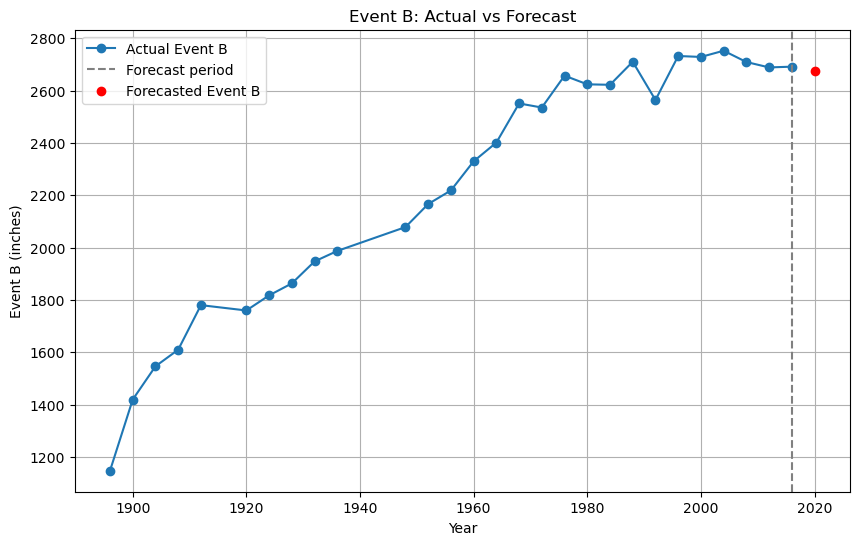

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data for Event B (from the provided data)
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 
             1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    'Event_B': [1147.291, 1419.253, 1546.223, 1609.682, 1779.911, 1759.583, 1817.203, 
                1862.966, 1947.006, 1987.049, 2078.172, 2166.316, 2218.216, 2329.589, 
                2401.093, 2550.667, 2535.003, 2656.781, 2623.695, 2621.921, 2709.923, 
                2563.777, 2731.929, 2728.301, 2752.087, 2708.948, 2688.271, 2691.149]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Double Exponential Smoothing using the given alpha and beta
alpha = 0.2
beta = 0.9

# Fit the Double Exponential Smoothing model (Trend but no seasonality)
model = ExponentialSmoothing(df['Event_B'], trend='add', seasonal=None)
fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)

# Forecast the next event (1 period ahead)
forecast = fit.forecast(1)

# Display the forecasted value
print(f"Double Exponential Smoothing Forecast for the next event: {forecast.iloc[0]:.3f} in.")

# Plotting the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Event_B'], label='Actual Event B', marker='o')
plt.axvline(x=df['Year'].max(), color='gray', linestyle='--', label='Forecast period')
plt.scatter(df['Year'].max() + 4, forecast, color='red', label='Forecasted Event B', zorder=5)
plt.title('Event B: Actual vs Forecast')
plt.xlabel('Year')
plt.ylabel('Event B (inches)')
plt.legend()
plt.grid()
plt.show()

Holt-Winters Additive Forecast for the next event: 330.805 in.


/var/folders/7x/k4kt73kx58ndk6rmm4bn6qdm0000gn/T/ipykernel_36725/2135609205.py:26: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit_additive = model_additive.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


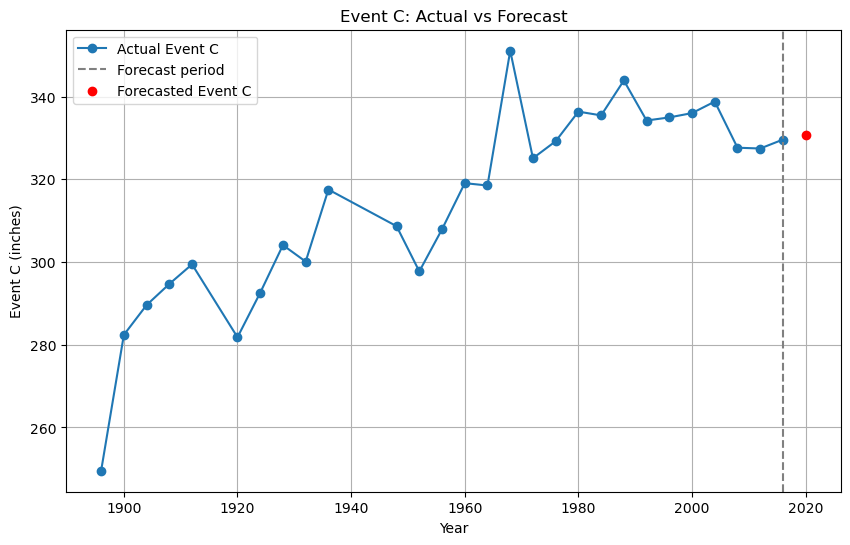

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Data for Event C (from the provided data)
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 
             1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    'Event_C': [249.523, 282.377, 289.589, 294.693, 299.439, 281.804, 292.571, 
                304.091, 300.106, 317.527, 308.668, 297.734, 307.926, 319.073, 
                318.508, 351.105, 325.099, 329.217, 336.377, 335.464, 343.905, 
                334.226, 334.975, 336.019, 338.804, 327.648, 327.455, 329.616]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Holt-Winters additive seasonality model using given alpha, beta, and gamma
alpha = 0.2
beta = 0.9
gamma = 0.7
season_length = 4  # Assuming yearly seasonality for every 4 periods (could be adjusted)

# Fit the Holt-Winters model
model_additive = ExponentialSmoothing(df['Event_C'], trend='add', seasonal='add', seasonal_periods=season_length)
fit_additive = model_additive.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Forecast the next event (1 period ahead)
forecast_additive = fit_additive.forecast(1)

# Display the forecasted value for the Holt-Winters additive seasonality model
print(f"Holt-Winters Additive Forecast for the next event: {forecast_additive.iloc[0]:.3f} in.")

# Plotting the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Event_C'], label='Actual Event C', marker='o')
plt.axvline(x=df['Year'].max(), color='gray', linestyle='--', label='Forecast period')
plt.scatter(df['Year'].max() + 4, forecast_additive, color='red', label='Forecasted Event C', zorder=5)
plt.title('Event C: Actual vs Forecast')
plt.xlabel('Year')
plt.ylabel('Event C (inches)')
plt.legend()
plt.grid()
plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample data for Event C
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
             1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984,
             1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    'Event C (inches)': [249.523, 282.377, 289.589, 294.693, 299.439, 
                         281.804, 292.571, 304.091, 300.106, 317.527, 
                         308.668, 297.734, 307.926, 319.073, 318.508,
                         351.105, 325.099, 329.217, 336.377, 335.464,
                         343.905, 334.226, 334.975, 336.019, 338.804, 
                         327.648, 327.455, 329.616]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit Holt-Winters model with additive seasonality
model = ExponentialSmoothing(df['Event C (inches)'], 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=4)  # Adjust seasonal periods as necessary

fit = model.fit(smoothing_level=0.2, 
                smoothing_trend=0.9, 
                smoothing_seasonal=0.7)

# Forecast the next event
forecast = fit.forecast(1)

# Display the forecasts
print(f"Holt-Winters Additive Forecast for the next event: {forecast[0]:.3f} in.")

# Optionally, plot the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Event C (inches)'], label='Actual', marker='o')
plt.axvline(x=df['Year'].iloc[-1], color='red', linestyle='--')
plt.scatter(df['Year'].iloc[-1] + 1, forecast[0], color='orange', label='Forecast')
plt.title('Event C Forecast')
plt.xlabel('Year')
plt.ylabel('Winning Distance (inches)')
plt.legend()
plt.grid()
plt.show()


KeyError: 0

Holt-Winters Additive Forecast for the next event: 330.805 in.


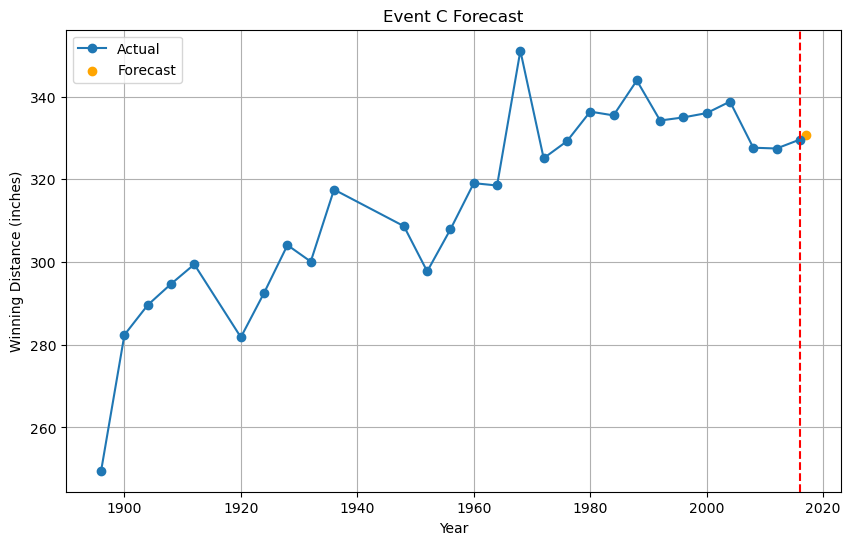

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample data for Event C
data = {
    'Year': [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
             1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984,
             1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016],
    'Event C (inches)': [249.523, 282.377, 289.589, 294.693, 299.439, 
                         281.804, 292.571, 304.091, 300.106, 317.527, 
                         308.668, 297.734, 307.926, 319.073, 318.508,
                         351.105, 325.099, 329.217, 336.377, 335.464,
                         343.905, 334.226, 334.975, 336.019, 338.804, 
                         327.648, 327.455, 329.616]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit Holt-Winters model with additive seasonality
model = ExponentialSmoothing(df['Event C (inches)'], 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=4)  # Adjust seasonal periods as necessary

fit = model.fit(smoothing_level=0.2, 
                smoothing_trend=0.9, 
                smoothing_seasonal=0.7)

# Forecast the next event
forecast = fit.forecast(1)

# Display the forecasts using .iloc to access the first element
print(f"Holt-Winters Additive Forecast for the next event: {forecast.iloc[0]:.3f} in.")

# Optionally, plot the actual data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Event C (inches)'], label='Actual', marker='o')
plt.axvline(x=df['Year'].iloc[-1], color='red', linestyle='--')
plt.scatter(df['Year'].iloc[-1] + 1, forecast.iloc[0], color='orange', label='Forecast')
plt.title('Event C Forecast')
plt.xlabel('Year')
plt.ylabel('Winning Distance (inches)')
plt.legend()
plt.grid()
plt.show()


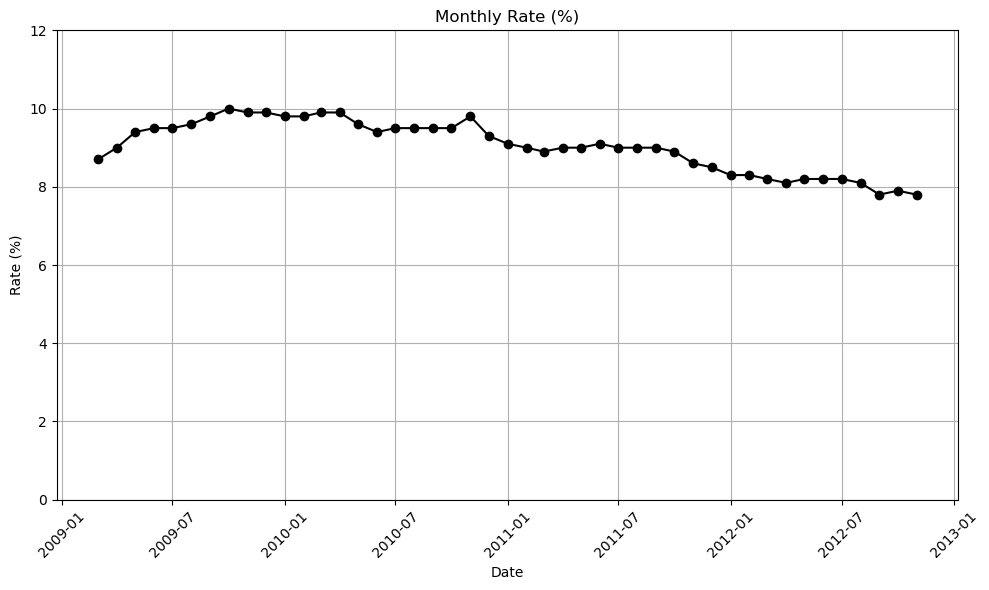

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_08 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Combine Year and Month to create a date column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'] + '-01')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Rate (%)'], marker='o', color='black')

# Set the title and labels
plt.title('Monthly Rate (%)')
plt.xlabel('Date')
plt.ylabel('Rate (%)')

# Set the y-axis limit
plt.ylim(0, 12)  # Adjust this according to your data range

# Show grid
plt.grid(True)

# Format the x-axis to show dates properly
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Show the plot
plt.show()


ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of labels (24).

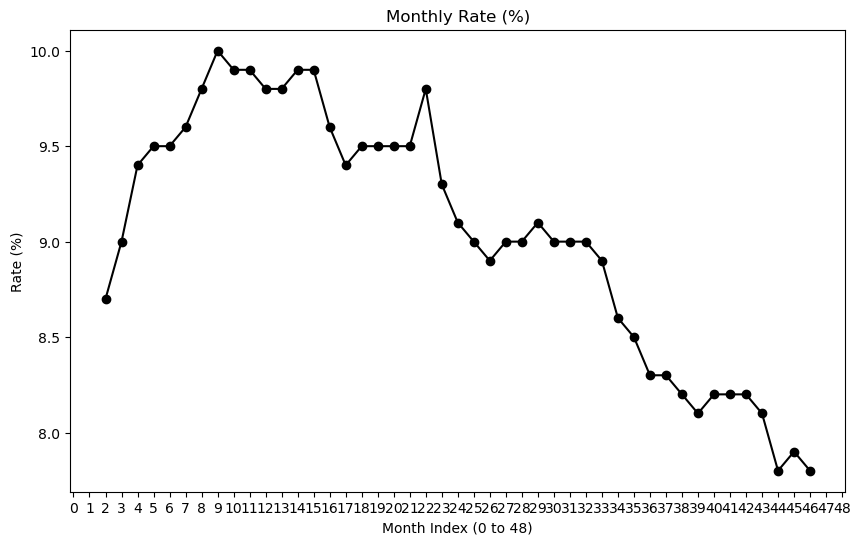

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_08 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Create a month index for the x-axis (0 for Jan 2009, 1 for Feb 2009, ..., 47 for Dec 2010)
data['Month Index'] = (data['Year'] - data['Year'].min()) * 12 + data['Month'].apply(lambda x: {
    'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5,
    'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11
}[x])

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Month Index'], data['Rate (%)'], marker='o', color='black')

# Set the title and labels
plt.title('Monthly Rate (%)')
plt.xlabel('Month Index (0 to 48)')
plt.ylabel('Rate (%)')

# Set the x-axis ticks to show month labels
plt.xticks(ticks=range(0, 49, 1), labels=[f'{year}-{month}' for year in range(2009, 2011) for month in [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]][:len(data)], rotation=45)

# Set the y-axis limit
plt.ylim(0, 12)  # Adjust this according to your data range

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (24).

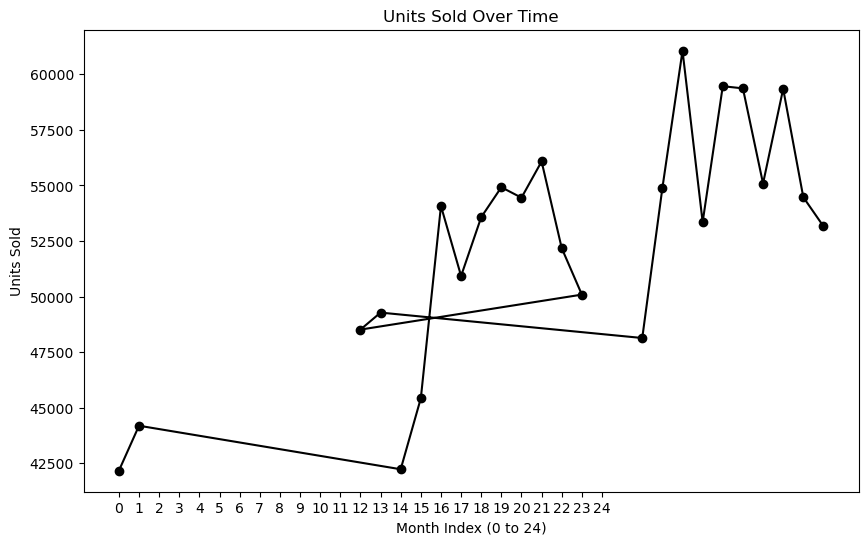

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_19 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Create a month index for the x-axis (0 for Nov Year 1, 1 for Dec Year 1, ..., 11 for Oct Year 2)
data['Month Index'] = (data['Year'] - data['Year'].min()) * 12 + data['Month'].apply(lambda x: {
    'Nov': 0, 'Dec': 1, 'Jan': 2, 'Feb': 3, 'Mar': 4, 'Apr': 5,
    'May': 6, 'Jun': 7, 'Jul': 8, 'Aug': 9, 'Sep': 10, 'Oct': 11
}[x])

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['Month Index'], data['Units'], marker='o', color='black')

# Set the title and labels
plt.title('Units Sold Over Time')
plt.xlabel('Month Index (0 to 24)')
plt.ylabel('Units Sold')

# Set the x-axis ticks to show month labels
plt.xticks(ticks=range(0, 25, 1), labels=[f'Year {year} - {month}' for year in range(1, 3) for month in [
    'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
]][:len(data)], rotation=45)

# Set the y-axis limit
plt.ylim(0, data['Units'].max() + 1000)  # Adjust this according to your data range

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()

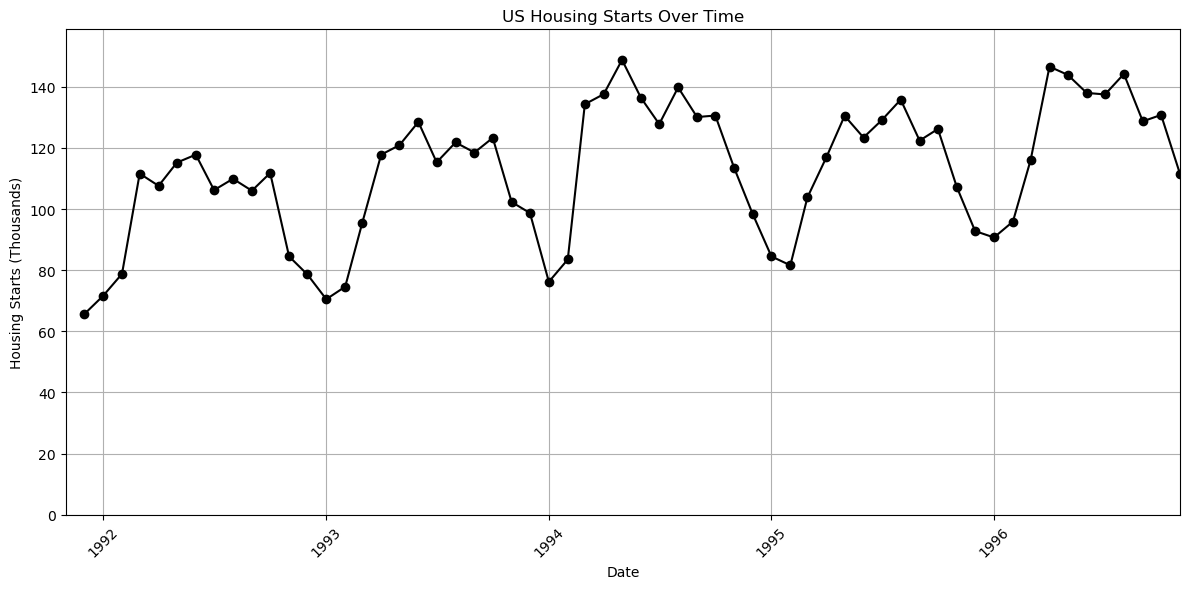

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_22 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'], format='%b %Y')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Number (Thousands)'], marker='o', color='black')

# Set the title and labels
plt.title('US Housing Starts Over Time')
plt.xlabel('Date')
plt.ylabel('Housing Starts (Thousands)')

# Set the x-axis limits to focus on the range Nov 1991 to Nov 1996
plt.xlim(pd.Timestamp('1991-11-01'), pd.Timestamp('1996-11-01'))

# Set the y-axis limit
plt.ylim(0, data['Number (Thousands)'].max() + 10)  # Adjust according to your data range

# Show grid
plt.grid(True)

# Format the x-axis to show dates properly
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Show the plot
plt.show()

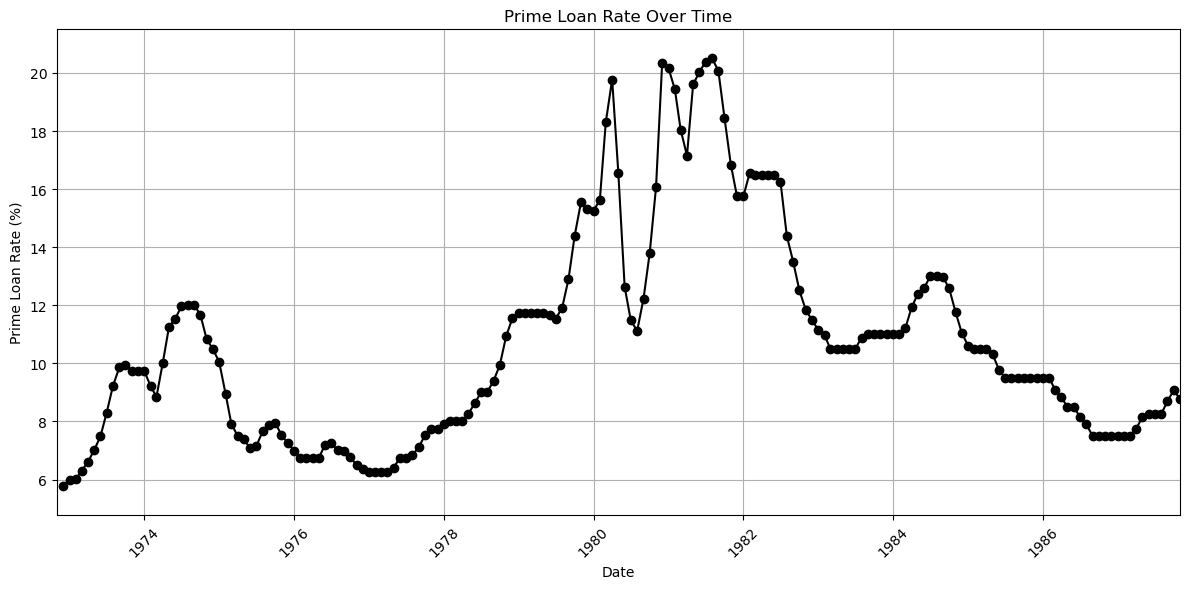

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_26 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Convert the 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'], format='%b %Y')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Percent'], marker='o', color='black')

# Set the title and labels
plt.title('Prime Loan Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Prime Loan Rate (%)')

# Set the x-axis limits to focus on the range Nov 1972 to Nov 1987
plt.xlim(pd.Timestamp('1972-11-01'), pd.Timestamp('1987-11-01'))

# Set the y-axis limit
plt.ylim(data['Percent'].min() - 1, data['Percent'].max() + 1)  # Adjust according to your data range

# Show grid
plt.grid(True)

# Format the x-axis to show dates properly
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Show the plot
plt.show()

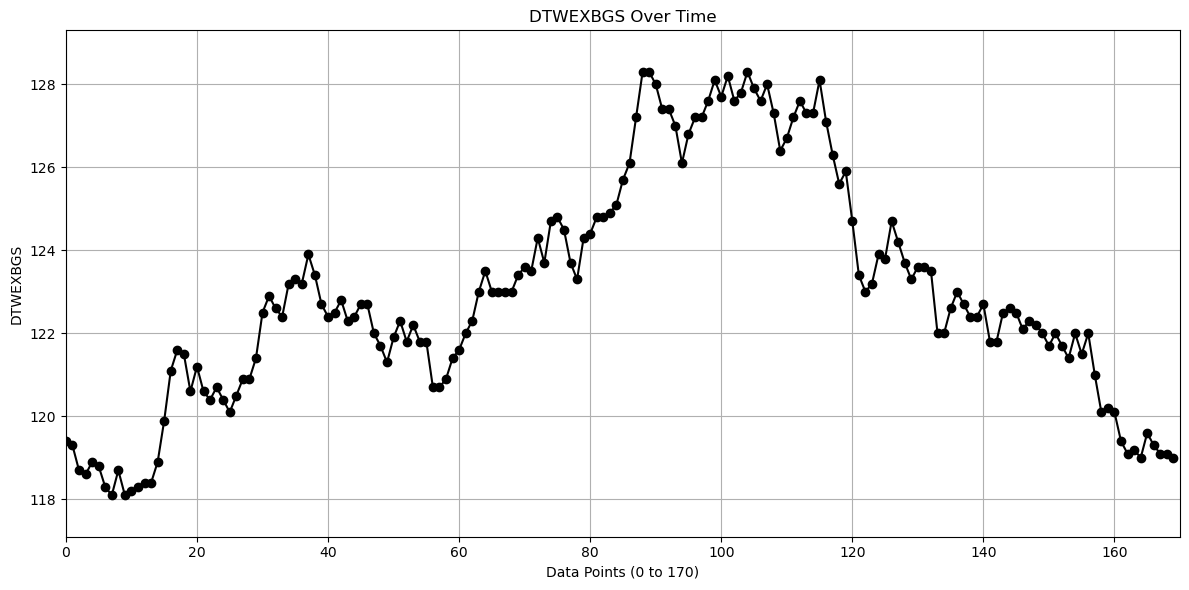

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel sheet (first sheet)
file_path = '/Users/likhithareddykesara/Downloads/data-10_6_2024-7_31 PM.xlsx'  # Replace with your actual file path

# Read the first sheet of the Excel file
data = pd.read_excel(file_path)

# Create a datetime column from Month, Day, and Year
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DTWEXBGS'], marker='o', color='black')  # Use index for x-axis

# Set the title and labels
plt.title('DTWEXBGS Over Time')
plt.xlabel('Data Points (0 to 170)')
plt.ylabel('DTWEXBGS')

# Set the x-axis limits
plt.xlim(0, 170)  # Adjust according to your data points if necessary

# Set the y-axis limit
plt.ylim(data['DTWEXBGS'].min() - 1, data['DTWEXBGS'].max() + 1)  # Adjust according to your data range

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.show()


In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create DataFrame with the temperature data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] * 2 + ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"],
    "Year": [1999] * 12 + [2000] * 12 + [2001] * 9,
    "Temperature": [34.91, 37.52, 41.36, 53.04, 62.83, 70.77, 78.52, 75.36, 67.02, 53.06, 50.07, 38.16,
                    32.67, 36.79, 48.19, 53.59, 64.81, 72.28, 72.08, 73.01, 65.23, 57.21, 42.94, 28.13,
                    32.3, 38.5, 36.2, 55.5, 60.8, 69, 72.2, 74.1, 65.3]
}

# Create the DataFrame
df = pd.DataFrame(data)

# One-hot encode the 'Month' column
df = pd.get_dummies(df, columns=['Month'], drop_first=True)

# Define the features and target variable
X = df.drop(columns=['Temperature'])
y = df['Temperature']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Prepare future data for prediction
future_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
future_year = 2001

# Create future DataFrame
future_data = pd.DataFrame({
    'Year': [future_year] * len(future_months),
    'Month': future_months
})

# One-hot encode the future months
future_data = pd.get_dummies(future_data, columns=['Month'], drop_first=True)

# Ensure all necessary columns are present in the future data
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0

# Predict future temperatures
predictions = model.predict(future_data[X.columns])

# Combine predictions with future months
forecast_results = pd.DataFrame({
    'Month': future_months,
    'Predicted_Temperature': predictions
})

print(forecast_results)


Coefficients:
Year: -1.2274
Month_Aug: 20.1133
Month_Dec: -21.5121
Month_Feb: -16.4400
Month_Jan: -20.7500
Month_Jul: 20.2233
Month_Jun: 16.6400
Month_Mar: -12.1267
Month_May: 8.7700
Month_Nov: -8.1521
Month_Oct: 0.4779
Month_Sep: 11.8067
  Month  Predicted_Temperature
0   Jan              32.065897
1   Feb              36.375897
2   Mar              40.689231
3   Apr              52.815897
4   May              61.585897
5   Jun              69.455897
6   Jul              73.039231
7   Aug              72.929231
8   Sep              64.622564


In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create DataFrame with the temperature data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] * 2 + ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"],
    "Year": [1999] * 12 + [2000] * 12 + [2001] * 9,
    "Temperature": [34.91, 37.52, 41.36, 53.04, 62.83, 70.77, 78.52, 75.36, 67.02, 53.06, 50.07, 38.16,
                    32.67, 36.79, 48.19, 53.59, 64.81, 72.28, 72.08, 73.01, 65.23, 57.21, 42.94, 28.13,
                    32.3, 38.5, 36.2, 55.5, 60.8, 69, 72.2, 74.1, 65.3]
}

# Create DataFrame
df = pd.DataFrame(data)

# One-hot encode the 'Month' column, dropping the first month (Jan)
df = pd.get_dummies(df, columns=['Month'], drop_first=True)

# Define features (Year + Month Dummies) and target variable
X = df.drop(columns=['Temperature'])
y = df['Temperature']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# Prepare future data for prediction
future_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
future_year = 2001

# Create future DataFrame
future_data = pd.DataFrame({
    'Year': [future_year] * len(future_months),
    'Month': future_months
})

# One-hot encode the future months
future_data = pd.get_dummies(future_data, columns=['Month'], drop_first=True)

# Ensure all necessary columns are present in the future data
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0

# Ensure the order of columns matches the training data
future_data = future_data[X.columns]

# Predict future temperatures
predictions = model.predict(future_data)

# Combine predictions with future months
forecast_results = pd.DataFrame({
    'Month': future_months,
    'Predicted_Temperature': predictions
})

print(forecast_results)


Coefficients:
Year: -1.2274
Month_Aug: 20.1133
Month_Dec: -21.5121
Month_Feb: -16.4400
Month_Jan: -20.7500
Month_Jul: 20.2233
Month_Jun: 16.6400
Month_Mar: -12.1267
Month_May: 8.7700
Month_Nov: -8.1521
Month_Oct: 0.4779
Month_Sep: 11.8067
  Month  Predicted_Temperature
0   Jan              32.065897
1   Feb              36.375897
2   Mar              40.689231
3   Apr              52.815897
4   May              61.585897
5   Jun              69.455897
6   Jul              73.039231
7   Aug              72.929231
8   Sep              64.622564


In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_excel('/Users/likhithareddykesara/Downloads/IEEM_QUIZ/Q7_ temperature.xlsx')

# Create dummy variables for categorical variables (e.g., Month)
data = pd.get_dummies(data, columns=['Month'])

# Define your dependent and independent variables
y = data['Temperature']
X = data.drop('Temperature', axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Make predictions for the next nine months
# Assuming you have a DataFrame 'new_data' with the relevant values for Year and Month
new_data = pd.DataFrame({'Year': [2001]*9, 'Month_1': [1]*9, 'Month_2': [0]*9, 'Month_3': [0]*9, 'Month_4': [0]*9, 'Month_5': [0]*9, 'Month_6': [0]*9, 'Month_7': [0]*9, 'Month_8': [0]*9, 'Month_9': [0]*9, 'Month_10': [0]*9, 'Month_11': [0]*9})
new_data = pd.get_dummies(new_data, columns=['Month'])
new_data = sm.add_constant(new_data)
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.55e-13
Time:                        21:26:30   Log-Likelihood:                -74.952
No. Observations:                  33   AIC:                             175.9
Df Residuals:                      20   BIC:                             195.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2315.8486   1259.309      1.839      0.0

KeyError: "None of [Index(['Month'], dtype='object')] are in the [columns]"

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_excel('/Users/likhithareddykesara/Downloads/IEEM_QUIZ/Q7_ temperature.xlsx')

# Create dummy variables for categorical variables (e.g., Month)
data = pd.get_dummies(data, columns=['Month'])

# Define your dependent and independent variables
y = data['Temperature']
X = data.drop('Temperature', axis=1)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Create a DataFrame for the next nine months (assuming 'Month' columns exist in your data)
new_data = pd.DataFrame({'Year': [2001]*9})

# Add all month columns from your original data to new_data (assuming Month_1 to Month_12)
for month in range(1, 13):
  new_data[f'Month_{month}'] = [0]*9  # Fill with zeros (adjust if needed)

# Make predictions
new_data = pd.get_dummies(new_data, columns=['Month'])  # Now create dummy variables
new_data = sm.add_constant(new_data)
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.55e-13
Time:                        21:27:14   Log-Likelihood:                -74.952
No. Observations:                  33   AIC:                             175.9
Df Residuals:                      20   BIC:                             195.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2315.8486   1259.309      1.839      0.0

KeyError: "None of [Index(['Month'], dtype='object')] are in the [columns]"

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_excel('/Users/likhithareddykesara/Downloads/IEEM_QUIZ/Q7_ temperature.xlsx')

# Define your dependent and independent variables
y = data['Temperature']
X = data.drop('Temperature', axis=1)

# Identify and handle non-numeric columns (if any)
categorical_cols = ['Month']  # Replace with actual categorical column names
X = pd.get_dummies(X, columns=categorical_cols)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Create a DataFrame for the next nine months
new_data = pd.DataFrame({'Year': [2001]*9})

# Add Month Columns (adjust names if needed)
for month in range(1, 13):
  new_data[f'Month_{month}'] = [0]*9  # Fill with zeros (adjust if needed)

# Make predictions
new_data = pd.get_dummies(new_data, columns=['Month'])  # Now create dummy variables
new_data = sm.add_constant(new_data)
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.55e-13
Time:                        21:29:10   Log-Likelihood:                -74.952
No. Observations:                  33   AIC:                             175.9
Df Residuals:                      20   BIC:                             195.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2315.8486   1259.309      1.839      0.0

KeyError: "None of [Index(['Month'], dtype='object')] are in the [columns]"

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load your data (replace 'your_data.csv' with your actual file)
data = pd.read_excel('/Users/likhithareddykesara/Downloads/IEEM_QUIZ/Q7_ temperature.xlsx')

# Define your dependent and independent variables
y = data['Temperature']
X = data.drop('Temperature', axis=1)

# Identify and handle non-numeric columns (if any)
categorical_cols = ['Month']  # Replace with actual categorical column names
X = pd.get_dummies(X, columns=categorical_cols)

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Create a DataFrame for the next nine months
new_data = pd.DataFrame({'Year': [2001]*9})

# Add Month Columns (adjust names if needed)
for month in range(1, 13):
  new_data[f'Month_{month}'] = [0]*9  # Fill with zeros (adjust if needed)

# Make predictions (remove the constant term from new_data)
month_cols = list(new_data.filter(like='Month'))
new_data = pd.get_dummies(new_data, columns=month_cols)
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     68.47
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.55e-13
Time:                        21:30:58   Log-Likelihood:                -74.952
No. Observations:                  33   AIC:                             175.9
Df Residuals:                      20   BIC:                             195.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2315.8486   1259.309      1.839      0.0

ValueError: shapes (9,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)